In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from math import sqrt


## 1. SOLUCION CERRADA REGRESION LINEAL

In [18]:
X = 3*np.random.rand(100, 1)


In [19]:
u = np.random.uniform(-2,5,100)
u = u.reshape(-1,1)
u.shape

(100, 1)

In [20]:
y = 5 + 2*X + u

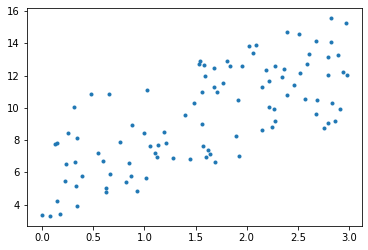

In [21]:
plt.plot(X,y,'.')

In [22]:
X_ = np.c_[np.ones((100,1)), X] #concatenar 1 a variables independientes
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y) #calcular thetas de forma cerrada
theta_opt 

array([[5.51202389],
       [2.49745681]])

In [23]:
X_nuevo = np.array([[0], [3]])
print(X_nuevo)
X_nuevo_ = np.c_[np.ones((2,1)), X_nuevo]
print(X_nuevo_)
y_pred = X_nuevo_.dot(theta_opt)
print('pred', y_pred)
mse = mean_squared_error(X_nuevo , y_pred)
mse ##error cuadratico medio

[[0]
 [3]]
[[1. 0.]
 [1. 3.]]
pred [[ 5.51202389]
 [13.00439432]]


65.23515653933971

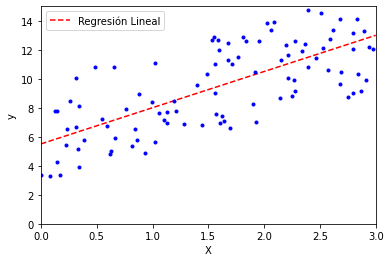

In [24]:
plt.plot(X_nuevo, y_pred, 'r--')
plt.plot(X,y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([0, 3, 0, 15])
plt.legend(["Regresión Lineal"])
plt.show()


## 2 SOLUCION REGRESION POLINOMIAL

In [25]:
data = pd.read_csv('ts.csv').sample(200)
data = data.sort_values(by=['tiempo'])
data.shape
data

,tiempo,magnitud
11,-1.400220,-0.448381
18,-1.392969,0.753506
20,-1.391592,-0.417365
30,-1.379880,-1.262563
34,-1.378315,-1.285825
...,...,...
1197,2.387075,-0.242897
1204,2.433738,-1.440907
1205,2.440922,-1.250932
1213,2.477358,-1.518448


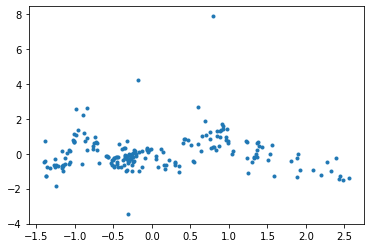

In [26]:
y = data['magnitud']
x = data['tiempo']
plt.plot(x,y,'.')


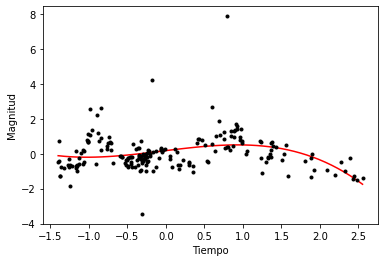

In [27]:
polinomio = PolynomialFeatures(degree = 3)
model = LinearRegression() 
x = data['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x)
data_poly.shape
model.fit(data_poly, data['magnitud'])

x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(data['tiempo'], data['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

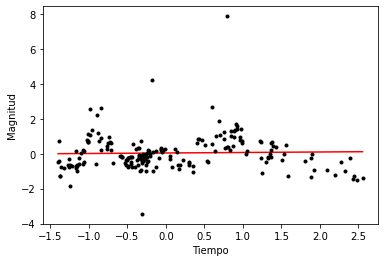

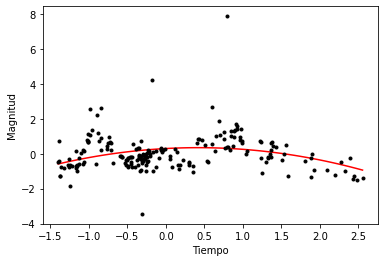

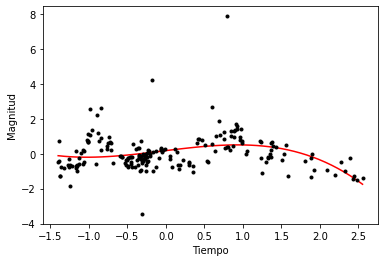

In [28]:
for i in range(1, 4):
    polinomio = PolynomialFeatures(degree = i)
    model = LinearRegression() 
    x = data['tiempo'].values.reshape(-1,1)
    data_poly = polinomio.fit_transform(x)
    data_poly.shape
    model.fit(data_poly, data['magnitud'])

    x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
    data_poly_plot = polinomio.fit_transform(x_lin)
    y_pred = model.predict(data_poly_plot)

    plt.plot(x_lin,y_pred, color='red')
    plt.plot(data['tiempo'], data['magnitud'],'.', color='black')
    plt.ylabel('Magnitud')
    plt.xlabel('Tiempo')
    plt.show()

### La linea se va deformando hasta alcanzar varios puntos sin embargo aumenta su complejidad y se va deformando es peligroso porque puede caear en aprender de memoria los datos

## 3. SOLUCION REGRESION CON PENALIZACION

### Ridge y Lasso en una sola funcion combinando distintos grados de polinomio y distintos valores de alpha

Valores para Ridge
[0.         0.02884159]
Valores para Lasso
[0.         0.01434329]


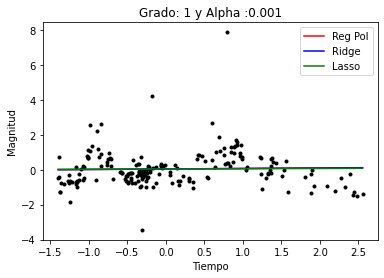

Valores para Ridge
[0.         0.02624585]
Valores para Lasso
[0. 0.]


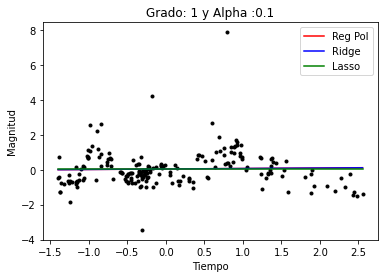

Valores para Ridge
[0.         0.01924696]
Valores para Lasso
[0. 0.]


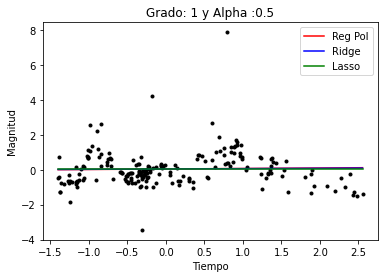

Valores para Ridge
[0.         0.00721761]
Valores para Lasso
[0. 0.]


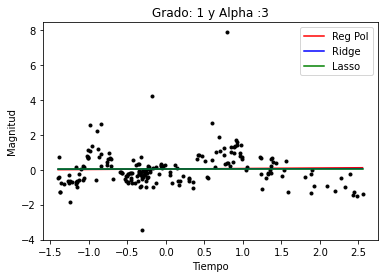

Valores para Ridge
[0.         0.00262459]
Valores para Lasso
[0. 0.]


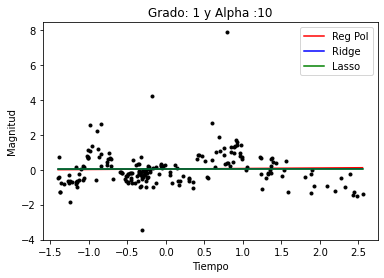

Valores para Ridge
[ 0.          0.53651474 -0.02875979 -0.1862444 ]
Valores para Lasso
[ 0.          0.45629155 -0.04388352 -0.15666625]


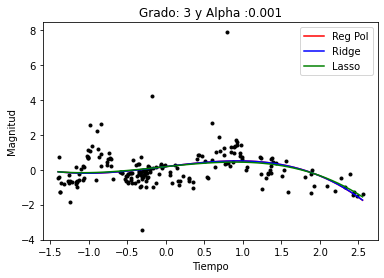

Valores para Ridge
[ 0.          0.33269254 -0.11250158 -0.09724813]
Valores para Lasso
[ 0.  0. -0. -0.]


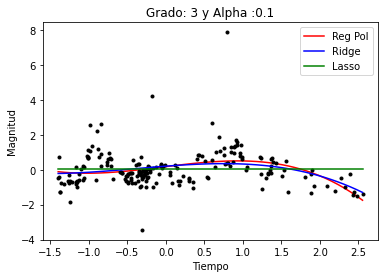

Valores para Ridge
[ 0.          0.14239927 -0.10455586 -0.04121775]
Valores para Lasso
[ 0.  0. -0. -0.]


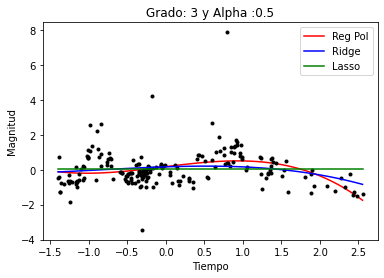

Valores para Ridge
[ 0.          0.023442   -0.04069515 -0.01336492]
Valores para Lasso
[ 0.  0. -0. -0.]


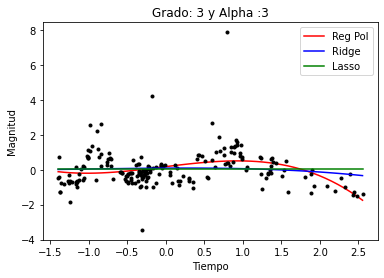

Valores para Ridge
[ 0.          0.0049055  -0.01559559 -0.00520573]
Valores para Lasso
[ 0.  0. -0. -0.]


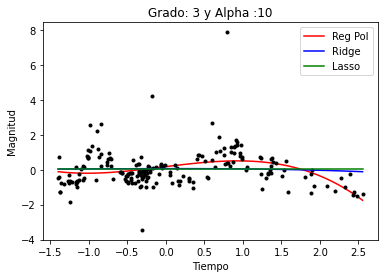

Valores para Ridge
[ 0.          0.59702693  0.95847415 -0.49149764 -0.5308641   0.20377825]
Valores para Lasso
[ 0.          0.3173728   0.         -0.0414714  -0.04739429  0.        ]


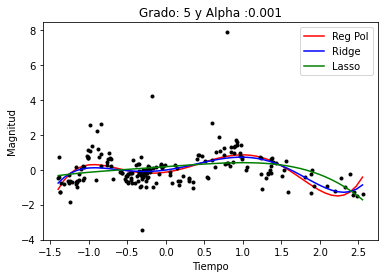

Valores para Ridge
[ 0.          0.29413039 -0.01999146 -0.04281464 -0.03284287 -0.00308585]
Valores para Lasso
[ 0.  0. -0. -0. -0. -0.]


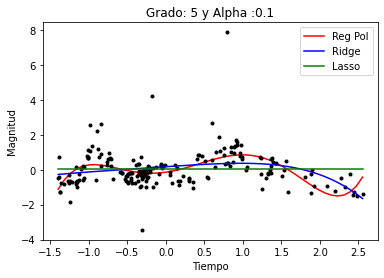

Valores para Ridge
[ 0.          0.15389521 -0.04791197 -0.01568282 -0.01792668 -0.00484742]
Valores para Lasso
[ 0.  0. -0. -0. -0. -0.]


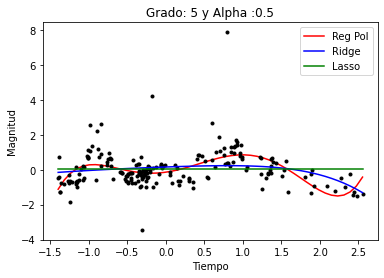

Valores para Ridge
[ 0.          0.0317756  -0.02860691 -0.00825822 -0.00723412 -0.00240809]
Valores para Lasso
[ 0.  0. -0. -0. -0. -0.]


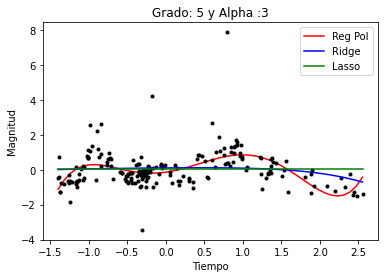

Valores para Ridge
[ 0.          0.00676502 -0.01333904 -0.00424701 -0.00311956 -0.00109917]
Valores para Lasso
[ 0.  0. -0. -0. -0. -0.]


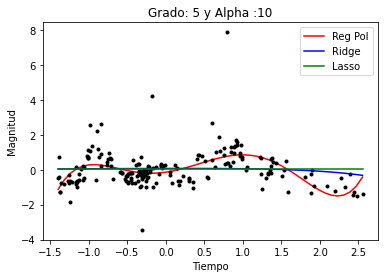

In [29]:
valores_grados = [1,3,5]
valores_alpha = [0.001,0.1,0.5,3,10]
for grado in valores_grados:
    for alpha in valores_alpha:
        ##Creando polinomio
        polinomio = PolynomialFeatures(degree = grado)
        model = LinearRegression() 
        x = data['tiempo'].values.reshape(-1,1)
        data_poly = polinomio.fit_transform(x)   
        model.fit(data_poly, data['magnitud'])
        x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
        data_poly_plot = polinomio.fit_transform(x_lin)
        y_pred = model.predict(data_poly_plot)

        ##Ridge
        modelo = Ridge(alpha=alpha,normalize=True)
        modelo.fit(data_poly,data['magnitud'])
        y_pred_ridge = modelo.predict(data_poly_plot)
        ##Calculando valores para Ridge
        print("Valores para Ridge")
        print(modelo.coef_)
        
        ##Lasso
        modelo_lasso = Lasso(alpha=alpha,normalize=True)
        modelo_lasso.fit(data_poly,data['magnitud'])
        y_pred_lasso = modelo_lasso.predict(data_poly_plot)
        ##Calculando valores para Lasso
        print("Valores para Lasso")
        print(modelo_lasso.coef_)
        
        ##Graficando polinomio
        plt.plot(x_lin,y_pred, color='red', label='Reg Pol')
        plt.plot(data['tiempo'], data['magnitud'],'.', color='black')
        ##graficando ridge
        plt.plot(x_lin,y_pred_ridge, color='blue', label='Ridge')
        ##Graficando lasso
        plt.plot(x_lin,y_pred_lasso, color='green', label='Lasso')

        plt.legend()

        plt.ylabel('Magnitud')
        plt.xlabel('Tiempo')
        plt.title('Grado: '+ str(grado) + ' y Alpha :' + str(alpha))

        plt.show()    


### A mayor valor de alpha se va penalizando o genera una recta mientras que a menor valor se va amoldando mas tomando forma de la linea de reg polinomial. Jugando con los grados podemos apreciar que influyen pero no tanto como el valor de alpha

# 4. Solucion clasificadores

In [30]:
df = pd.read_csv('ts2.csv')
#df.loc[df['Class'] == 'NonVar']


In [31]:
df.dtypes
##Podemos apreciar los distintos tipos de datos y donde el label es categorico debemos pasarlo a numerico

Class                object
Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [32]:
#Podemos apreciar el promedio o media de cada columna
df.mean()

Amplitude             0.106905
AndersonDarling       0.130491
Autocor_length        4.545400
Beyond1Std            0.317532
Gskew                 0.016345
LinearTrend           0.000001
MaxSlope              2.175457
Mean                 14.988370
Meanvariance          0.003703
MedianAbsDev          0.039180
MedianBRP             0.414658
PercentAmplitude      0.010616
PeriodLS            302.831851
dtype: float64

In [33]:
#Podemos apreciar la varianza del dataset
df.var()

Amplitude           2.187318e-02
AndersonDarling     4.114344e-02
Autocor_length      3.746863e+01
Beyond1Std          3.651404e-03
Gskew               1.594835e-02
LinearTrend         4.680414e-07
MaxSlope            8.880651e+01
Mean                3.571989e+00
Meanvariance        3.055287e-05
MedianAbsDev        3.921826e-03
MedianBRP           1.505889e-02
PercentAmplitude    2.099512e-04
PeriodLS            8.923933e+05
dtype: float64

In [34]:
#Podemos apreciar la desviación estandar
df.std()

Amplitude             0.147896
AndersonDarling       0.202838
Autocor_length        6.121163
Beyond1Std            0.060427
Gskew                 0.126287
LinearTrend           0.000684
MaxSlope              9.423721
Mean                  1.889971
Meanvariance          0.005527
MedianAbsDev          0.062624
MedianBRP             0.122715
PercentAmplitude      0.014490
PeriodLS            944.665723
dtype: float64

In [35]:
#Podemos apreciar que no existen valores nulos dentro del dataset
for i in df.columns: 
    print(i+': '+ str(df[i].isnull().sum()))

Class: 0
Amplitude: 0
AndersonDarling: 0
Autocor_length: 0
Beyond1Std: 0
Gskew: 0
LinearTrend: 0
MaxSlope: 0
Mean: 0
Meanvariance: 0
MedianAbsDev: 0
MedianBRP: 0
PercentAmplitude: 0
PeriodLS: 0


In [36]:
#pasando dato categorico a numerico
number = LabelEncoder()
df['Class'] = number.fit_transform(df['Class'])
label=df['Class']

del df['Class']

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=0)

## Arboles de desicion

============== INFORME ================
depth = 1
mse: 1.12
accuracy: 0.828
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         6
           5       0.34      0.87      0.49        84
           6       0.96      0.99      0.97       763
           7       0.00      0.00      0.00       104
           8       0.00      0.00      0.00         2

    accuracy                           0.83      1000
   macro avg       0.16      0.23      0.18      1000
weighted avg       0.76      0.83      0.78      1000

============== INFORME ================
depth = 5
mse: 0.542
accuracy: 0.955
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.00      0.00      0.00         2
           2       0.76      0.81

c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

============== INFORME ================
depth = 10
mse: 0.694
accuracy: 0.958
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.00      0.00      0.00         2
           2       0.79      0.85      0.82        27
           4       1.00      0.67      0.80         6
           5       0.90      0.85      0.87        84
           6       0.99      0.99      0.99       763
           7       0.91      0.93      0.92       104
           8       0.50      0.50      0.50         2

    accuracy                           0.96      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.96      0.96      0.96      1000

============== INFORME ================
depth = 100
mse: 0.677
accuracy: 0.957
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.00      0.00      0.00         2
           2       0.82      

c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

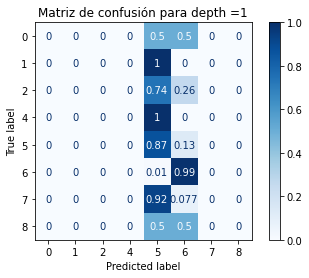

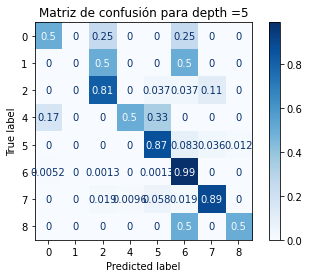

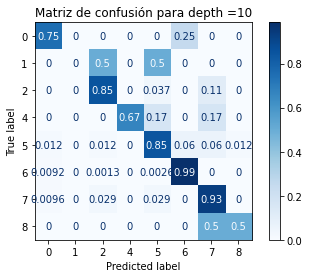

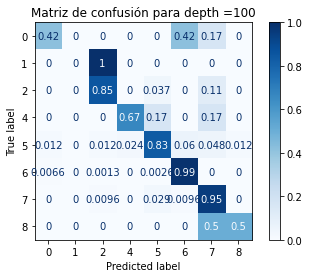

In [38]:
depths = [1,5,10,100]
for depth in depths:
    clf = DecisionTreeClassifier(criterion= "entropy", max_depth = depth)

    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    print("============== INFORME ================")
    print("depth = "+ str(depth))
    print("mse: "+ str(mse))
    print("accuracy: "+ str(accuracy))
    print(classification_report(y_test, pred))

    disp = plot_confusion_matrix(clf, X_test, y_test,                                 
                                     cmap=plt.cm.Blues,
                                     normalize='true')
    disp.ax_.set_title('Matriz de confusión para depth ='+ str(depth))

### Podemos apreciar que despues del depth = 5 si subimos no mejora mucho nuestro rendimiento por lo tanto se vuelve complejo de forma innecesaria. Por otra parte podemos apreciar que tal vez tengamos un problema de balanceo de clases


## Naive Bayes

mse: 3.233
accuracy: 0.853
              precision    recall  f1-score   support

           0       0.14      0.92      0.24        12
           1       0.00      0.00      0.00         2
           2       0.49      0.74      0.59        27
           4       0.11      0.50      0.18         6
           5       0.82      0.54      0.65        84
           6       0.99      0.91      0.95       763
           7       0.85      0.75      0.80       104
           8       0.33      0.50      0.40         2

    accuracy                           0.85      1000
   macro avg       0.47      0.61      0.47      1000
weighted avg       0.93      0.85      0.88      1000



c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Text(0.5, 1.0, 'Matriz de confusión')

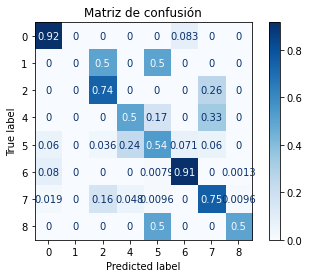

In [39]:
model = GaussianNB() ## se uso gauss mas que todo por los numeros negativos
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print("mse: "+ str(mse))
print("accuracy: "+ str(accuracy))
print(classification_report(y_test, pred))
## accuracy 0.848 con test size = 0.1
## accuracy 0.85 con test size = 0.3
## cambiando el test size varia muy poco el accuracy
disp = plot_confusion_matrix(model, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Matriz de confusión')

### Podemos preciar que naive bayes en su forma de gauss normal no es tan efectivo como la mejor version de arboles de desicion

### KNN

============== INFORME ================
Neighbors = 3
mse: 0.743
              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.00      0.00      0.00         2
           2       0.77      0.63      0.69        27
           4       0.50      0.33      0.40         6
           5       0.80      0.70      0.75        84
           6       0.97      1.00      0.99       763
           7       0.85      0.86      0.85       104
           8       0.00      0.00      0.00         2

    accuracy                           0.94      1000
   macro avg       0.56      0.52      0.54      1000
weighted avg       0.93      0.94      0.93      1000

============== INFORME ================
Neighbors = 5
mse: 0.833


c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.00      0.00      0.00         2
           2       0.71      0.56      0.63        27
           4       0.67      0.33      0.44         6
           5       0.74      0.65      0.70        84
           6       0.97      0.99      0.98       763
           7       0.80      0.84      0.82       104
           8       0.00      0.00      0.00         2

    accuracy                           0.92      1000
   macro avg       0.56      0.49      0.52      1000
weighted avg       0.92      0.92      0.92      1000

============== INFORME ================
Neighbors = 7
mse: 0.729


c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.00      0.00      0.00         2
           2       0.75      0.56      0.64        27
           4       0.50      0.17      0.25         6
           5       0.71      0.63      0.67        84
           6       0.97      0.99      0.98       763
           7       0.80      0.85      0.82       104
           8       0.00      0.00      0.00         2

    accuracy                           0.92      1000
   macro avg       0.56      0.48      0.51      1000
weighted avg       0.91      0.92      0.92      1000



c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sonny\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

============== INFORME ================
Neighbors = 99
mse: 1.144
              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.00      0.00      0.00         2
           2       0.78      0.26      0.39        27
           4       0.00      0.00      0.00         6
           5       0.67      0.49      0.57        84
           6       0.95      1.00      0.97       763
           7       0.64      0.78      0.70       104
           8       0.00      0.00      0.00         2

    accuracy                           0.89      1000
   macro avg       0.46      0.35      0.37      1000
weighted avg       0.88      0.89      0.88      1000



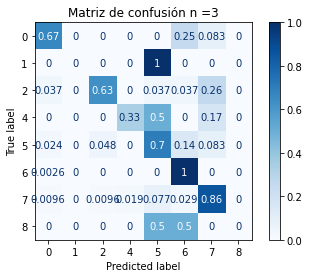

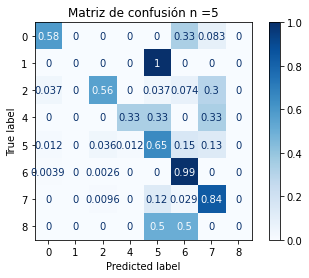

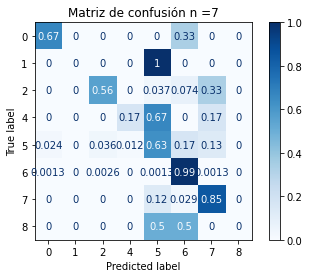

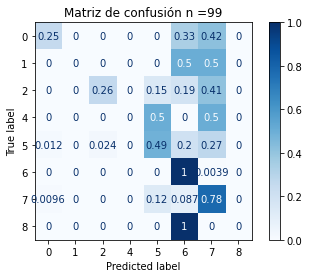

In [42]:
neighbors = [3,5,7,99]
for nei in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=nei)
    knn_model.fit(X_train, y_train)
    pred_knn = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, pred_knn)

    print("============== INFORME ================")
    print("Neighbors = "+ str(nei))
    print("mse: "+ str(mse))
    print(classification_report(y_test, pred_knn))

    disp = plot_confusion_matrix(knn_model, X_test, y_test,                                 
                                     cmap=plt.cm.Blues,
                                     normalize='true')
    disp.ax_.set_title('Matriz de confusión n =' + str(nei))

Comparando vecinos mas cercanos el N que se ajusta mejor es el 3 por su baja complejidad y buen rendimiento